# 1-7. 프로젝트: 가위바위보 분류기 만들기

### 1. 필요한 라이브러리 설치

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image            # 이미지 불러오는 라이브러리
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### 2. 데이터 불러오기 및 resizing   
__가위 데이터 읽어와서 resizing__

In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/E01_RockPaperScissor/train/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac18/aiffel/E01_RockPaperScissor/train/scissor
가위 이미지 resize 완료!


__바위 데이터 읽어와서 resizing__

In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME")+"/aiffel/E01_RockPaperScissor/train/rock"
print("이미지 디렉토리 경로:", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size = (28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("바위 이미지 resize 완료!")

이미지 디렉토리 경로: /home/ssac18/aiffel/E01_RockPaperScissor/train/rock
바위 이미지 resize 완료!


__보 데이터 읽어와서 resizing__

In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME")+"/aiffel/E01_RockPaperScissor/train/paper"
print("이미지 디렉토리 경로:", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size = (28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("보 이미지 resize 완료!")

이미지 디렉토리 경로: /home/ssac18/aiffel/E01_RockPaperScissor/train/paper
보 이미지 resize 완료!


__load_data() 함수로 데이터 가져오기__  
* X_train, y_train 데이터셋 만들기

In [6]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3600   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/E01_RockPaperScissor/train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3300 입니다.
x_train shape: (3600, 28, 28, 3)
y_train shape: (3600,)


라벨:  0


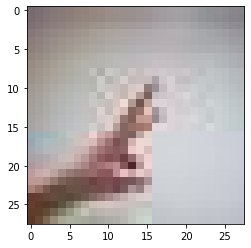

In [7]:
plt.imshow(x_train[0])     # 잘 불러오는지 확인
print('라벨: ', y_train[0])

### 3. 딥러닝 네트워크 설계하기  
__최적의 하이퍼파라미터찾기__

우선, 저는 적당히 큰 임의의 수를 하이퍼파라미터로 지정한 뒤 모델을 돌렸습니다. 각각 64, 128, 64의 값을 주었습니다.

In [8]:
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
hp_1 = 64
hp_2 = 128
dense = 64

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(hp_1, (3,3), activation='relu', input_shape=(28,28,3))) # 컬러 이미지이므로 1 아니고 3
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(hp_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # 가위, 바위, 보 -> 3개 클래스로 분류


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                204864    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

### 4. 딥러닝 네트워크 학습시키기

In [9]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
epoch = 16
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs= epoch)

Epoch 1/16
113/113 [==============================] - 3s 28ms/step - loss: 0.9376 - accuracy: 0.5289
Epoch 2/16
113/113 [==============================] - 0s 2ms/step - loss: 0.5863 - accuracy: 0.7567
Epoch 3/16
113/113 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8631
Epoch 4/16
113/113 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.9083
Epoch 5/16
113/113 [==============================] - 0s 2ms/step - loss: 0.1724 - accuracy: 0.9358
Epoch 6/16
113/113 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9558
Epoch 7/16
113/113 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9750
Epoch 8/16
113/113 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9822
Epoch 9/16
113/113 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9892
Epoch 10/16
113/113 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.991

### 5. 얼마나 잘 만들었는지 확인하기(테스트)

__테스트 데이터셋 만들기__

In [10]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
#test 데이터 가위 resizing
image_dir_path_01 = os.getenv("HOME") + "/aiffel/E01_RockPaperScissor/rock_scissor_paper_2/scissor"
print("이미지 디렉토리 경로: ", image_dir_path_01)

images=glob.glob(image_dir_path_01 + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

#test 데이터 바위 resizing
image_dir_path_02 = os.getenv("HOME")+"/aiffel/E01_RockPaperScissor/rock_scissor_paper_2/rock"
print("이미지 디렉토리 경로:", image_dir_path_02)

images=glob.glob(image_dir_path_02 + "/*.jpg")
target_size = (28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

# test 데이터 보 resizing
image_dir_path_03 = os.getenv("HOME")+"/aiffel/E01_RockPaperScissor/rock_scissor_paper_2/paper"
print("이미지 디렉토리 경로:", image_dir_path_03)

images=glob.glob(image_dir_path_03 + "/*.jpg")

target_size = (28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
  
  ###########################################

image_dir_path = os.getenv("HOME") + "/aiffel/E01_RockPaperScissor/rock_scissor_paper_2"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

이미지 디렉토리 경로:  /home/ssac18/aiffel/E01_RockPaperScissor/rock_scissor_paper_2/scissor
이미지 디렉토리 경로: /home/ssac18/aiffel/E01_RockPaperScissor/rock_scissor_paper_2/rock
이미지 디렉토리 경로: /home/ssac18/aiffel/E01_RockPaperScissor/rock_scissor_paper_2/paper
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (3600, 28, 28, 3)
y_test shape: (3600,)


__예측하기__

In [11]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose= 2)
print("test_loss :{} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

113/113 - 0s - loss: 0.2830 - accuracy: 0.9506
test_loss :0.2830098867416382 
test_accuracy: 0.9505555629730225


정확도가 95%가 나왔습니다. 예측의 정확도가 높으니 매우 좋은 모델입니다.  
그렇지만 다른 하이퍼파라미터 값을 넣었을 때 어떻게 변화하는지 살펴보겠습니다.  
우선, 3개의 하이퍼파라미터 값들이 대체로 낮거나 높은 경우 어떤 것이 더 좋은 모델인지 확인해보려 합니다.

최적의 하이퍼파라미터를 찾는 과정

### 함수 만들기..?

In [31]:
def auto_train(hp_1,hp_2):
#    hp_1 = [16, 32, 64, 128]                모든 하이퍼파라미터를 함수에 넣고 돌리려고 시도하다가 컴퓨터가 터질뻔 했습니다.
#    hp_2 = [16]
    dense = [16, 32, 64, 128]
    
    models = []
    info = []
    
#     for i in hp_1:
    
#     for j in hp_2:
    for k in dense:
        model = keras.models.Sequential()
        model.add(keras.layers.Conv2D(hp_1, (3,3), activation='relu', input_shape=(28,28,3))) # 컬러 이미지이므로 1 아니고 3
        model.add(keras.layers.MaxPool2D(2,2))
        model.add(keras.layers.Conv2D(hp_2, (3,3), activation='relu'))
        model.add(keras.layers.MaxPooling2D((2,2)))
        model.add(keras.layers.Flatten())
        model.add(keras.layers.Dense(k, activation='relu'))
        model.add(keras.layers.Dense(3, activation='softmax')) # 가위, 바위, 보 -> 3개 클래스로 분류

        models.append(model)    # 모델을 배열에 저장하기
        info.append(str(k))
#                model.summary()

    
    epoch = 20
    index = 0
    
    for model in models:
        print("--------------------------------------------------------------------------------------")
        print("models[",index ,"] : ", hp_1, "/", hp_2, "/", info[index], "- hp_1/hp_2/dense" )
        model.compile(optimizer = 'adam',
                      loss = 'sparse_categorical_crossentropy',
                      metrics = ['accuracy'])

        model.fit(x_train_norm, y_train, epochs= epoch)
        index = index + 1
                


In [32]:
auto_train(16,16)

--------------------------------------------------------------------------------------
models[ 0 ] :  16 / 16 / 16 - hp_1/hp_2/dense
Epoch 1/20
113/113 [==============================] - 0s 1ms/step - loss: 1.0458 - accuracy: 0.4864
Epoch 2/20
113/113 [==============================] - 0s 1ms/step - loss: 0.8556 - accuracy: 0.6031
Epoch 3/20
113/113 [==============================] - 0s 1ms/step - loss: 0.7214 - accuracy: 0.6981
Epoch 4/20
113/113 [==============================] - 0s 1ms/step - loss: 0.6252 - accuracy: 0.7483
Epoch 5/20
113/113 [==============================] - 0s 1ms/step - loss: 0.5567 - accuracy: 0.7792
Epoch 6/20
113/113 [==============================] - 0s 1ms/step - loss: 0.4881 - accuracy: 0.8114
Epoch 7/20
113/113 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8508
Epoch 8/20
113/113 [==============================] - 0s 1ms/step - loss: 0.3886 - accuracy: 0.8628
Epoch 9/20
113/113 [==============================] - 0s 1ms/step -

113/113 [==============================] - 0s 1ms/step - loss: 0.0319 - accuracy: 0.9931
Epoch 18/20
113/113 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.9892
Epoch 19/20
113/113 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9906
Epoch 20/20
113/113 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9958


이 중 가장 좋은 모델

In [ ]:
auto_train(16,32)

In [ ]:
auto_train(16,64)

In [ ]:
auto_train(16,128)

In [ ]:
auto_train(32,16)

In [ ]:
auto_train(32,32)

In [ ]:
auto_train(32,64)

In [ ]:
auto_train(32,128)

In [ ]:
auto_train(64,16)

In [ ]:
auto_train(64,32)

In [ ]:
auto_train(64,64)

In [ ]:
auto_train(64,128)

In [ ]:
auto_train(128,16)

In [ ]:
auto_train(128,32)

In [ ]:
auto_train(128,64)

In [ ]:
auto_train(128,128)

최적의 에포크 찾는 과정은 무엇이었는가

In [9]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
epoch = 16
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs= epoch)

Epoch 1/16
113/113 [==============================] - 1s 13ms/step - loss: 0.9153 - accuracy: 0.5456
Epoch 2/16
113/113 [==============================] - 1s 13ms/step - loss: 0.5583 - accuracy: 0.7672
Epoch 3/16
113/113 [==============================] - 2s 15ms/step - loss: 0.3381 - accuracy: 0.8689
Epoch 4/16
113/113 [==============================] - 4s 38ms/step - loss: 0.2267 - accuracy: 0.9117
Epoch 5/16
113/113 [==============================] - 2s 15ms/step - loss: 0.1626 - accuracy: 0.9403
Epoch 6/16
113/113 [==============================] - 1s 13ms/step - loss: 0.1240 - accuracy: 0.9567
Epoch 7/16
113/113 [==============================] - 1s 13ms/step - loss: 0.0996 - accuracy: 0.9678
Epoch 8/16
113/113 [==============================] - 3s 26ms/step - loss: 0.0631 - accuracy: 0.9808
Epoch 9/16
113/113 [==============================] - 3s 29ms/step - loss: 0.0558 - accuracy: 0.9844
Epoch 10/16
113/113 [==============================] - 1s 13ms/step - loss: 0.0410 - accura

In [11]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
#test 데이터 가위 resizing
image_dir_path_01 = os.getenv("HOME") + "/aiffel/E01_RockPaperScissor/rock_scissor_paper_2/scissor"
print("이미지 디렉토리 경로: ", image_dir_path_01)

images=glob.glob(image_dir_path_01 + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

#test 데이터 바위 resizing
image_dir_path_02 = os.getenv("HOME")+"/aiffel/E01_RockPaperScissor/rock_scissor_paper_2/rock"
print("이미지 디렉토리 경로:", image_dir_path_02)

images=glob.glob(image_dir_path_02 + "/*.jpg")
target_size = (28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

# test 데이터 보 resizing
image_dir_path_03 = os.getenv("HOME")+"/aiffel/E01_RockPaperScissor/rock_scissor_paper_2/paper"
print("이미지 디렉토리 경로:", image_dir_path_03)

images=glob.glob(image_dir_path_03 + "/*.jpg")

target_size = (28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
  
  ###########################################

image_dir_path = os.getenv("HOME") + "/aiffel/E01_RockPaperScissor/rock_scissor_paper_2"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

이미지 디렉토리 경로:  /home/ssac18/aiffel/E01_RockPaperScissor/rock_scissor_paper_2/scissor
이미지 디렉토리 경로: /home/ssac18/aiffel/E01_RockPaperScissor/rock_scissor_paper_2/rock
이미지 디렉토리 경로: /home/ssac18/aiffel/E01_RockPaperScissor/rock_scissor_paper_2/paper
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (3600, 28, 28, 3)
y_test shape: (3600,)


In [11]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose= 2)
print("test_loss :{} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

113/113 - 1s - loss: 0.3685 - accuracy: 0.9528
test_loss :0.3685218393802643 
test_accuracy: 0.9527778029441833


처음에 300개 데이터로 했던 것도 적어주기